In [41]:
import gym
import numpy as np
from IPython import display
from matplotlib import pyplot as plt

from envs import Maze
%matplotlib inline

In [3]:
env = Maze()

In [4]:
initial_state = env.reset()
print(initial_state)

(0, 0)


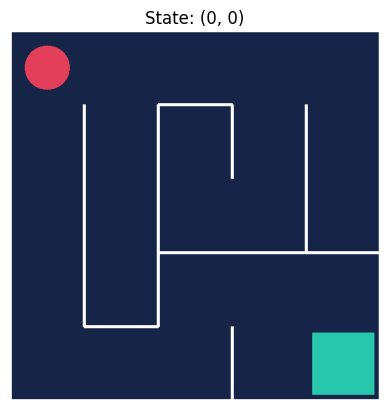

In [5]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f'State: {initial_state}')
plt.imshow(frame)

In [6]:
action = 2
next_state, reward, done, info = env.step(action)
print(f"After moving down 1 row, the agent is in state: {next_state}")
print(f"After moving down 1 row, we got a reward of: {reward}")
print(f"After moving down 1 row, the task is", "" if done else "not", "finished")

After moving down 1 row, the agent is in state: (1, 0)
After moving down 1 row, we got a reward of: -1.0
After moving down 1 row, the task is not finished


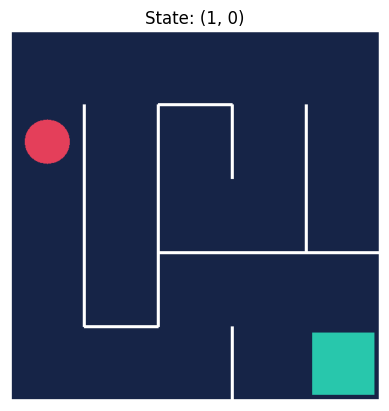

In [8]:
frame = env.render(mode='rgb_array')
plt.axis('off')
plt.title(f'State: {next_state}')
plt.imshow(frame)

In [9]:
env.close()

## Maze Environment:
. it has few states (25)
. Transitions between states are deterministic (p(s', r|s, a) = 1)
. All rewards are the same (-1) until the episode concludes

In [10]:
env = Maze()

In [12]:
print(f"For example, the initial state is: {env.reset()}")
print(f"The space sate is of type: {env.observation_space}")

For example, the initial state is: (0, 0)
The space sate is of type: MultiDiscrete([5 5])


In [13]:
print(f"An example of a valid action is: {env.action_space.sample()}")
print(f"The action is of type: {env.action_space}")


An example of a valid action is: 1
The action is of type: Discrete(4)


In [14]:
env.close()

- 0 -> up
- 1 -> right
- 2 -> down
- 3 -> left

In [15]:
evn = Maze()
state = env.reset()
trajectory = []
for _ in range(3):
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action=action)
    trajectory.append([state, action, reward, done, next_state])
    state = next_state
    
env.close()

print(f"Congrats! You just generated your first trajectory:\n{trajectory}")

Congrats! You just generated your first trajectory:
[[(0, 0), 2, -1.0, False, (1, 0)], [(1, 0), 1, -1.0, False, (1, 0)], [(1, 0), 2, -1.0, False, (2, 0)]]


In [16]:
evn = Maze()
state = env.reset()
trajectory = []
done = False
while not done:
    action = env.action_space.sample()
    next_state, reward, done, info = env.step(action=action)
    trajectory.append([state, action, reward, done, next_state])
    state = next_state
    
env.close()

print(f"Congrats! You just generated your first trajectory:\n{trajectory}")

Congrats! You just generated your first trajectory:
[[(0, 0), 3, -1.0, False, (0, 0)], [(0, 0), 0, -1.0, False, (0, 0)], [(0, 0), 1, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 0, -1.0, False, (0, 1)], [(0, 1), 0, -1.0, False, (0, 1)], [(0, 1), 1, -1.0, False, (0, 2)], [(0, 2), 2, -1.0, False, (0, 2)], [(0, 2), 0, -1.0, False, (0, 2)], [(0, 2), 3, -1.0, False, (0, 1)], [(0, 1), 2, -1.0, False, (1, 1)], [(1, 1), 1, -1.0, False, (1, 1)], [(1, 1), 2, -1.0, False, (2, 1)], [(2, 1), 1, -1.0, False, (2, 1)], [(2, 1), 1, -1.0, False, (2, 1)], [(2, 1), 2, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 1, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 3, -1.0, False, (3, 1)], [(3, 1), 2, -1.0, False, (3, 1)], [(3, 1), 0, -1.0, False, (2, 1)], [(2, 1), 3, -1.0, False, (2, 1)], [(2, 1), 0, -1.0, False, (1, 

In [21]:
env = Maze()
state = env.reset()
action = env.action_space.sample()
_, reward, _, _ = env.step(action)
print(f"We achieved a reward of {reward} by taking action {action} in state {state}")
env.close()

We achieved a reward of -1.0 by taking action 1 in state (0, 0)


In [34]:
env = Maze()
state = env.reset()
done = False
gamma = 0.99
G_0 = 0
t = 0
while not done:
    action = env.action_space.sample()
    _, reward, done, _ = env.step(action)
    G_0 += gamma ** t * reward
    t += 1
env.close()

print(f"""It took {t} steps to reach a total reward of {G_0}""")

It took 455 steps to reach a total reward of -98.96720639084882


In [35]:
def random_policy(state):
    return np.array([0.25]*4)

In [36]:
env = Maze()
state = env.reset()

In [37]:
action_probabilities = random_policy(state)

Text(0.5, 1.0, 'Random Policy')

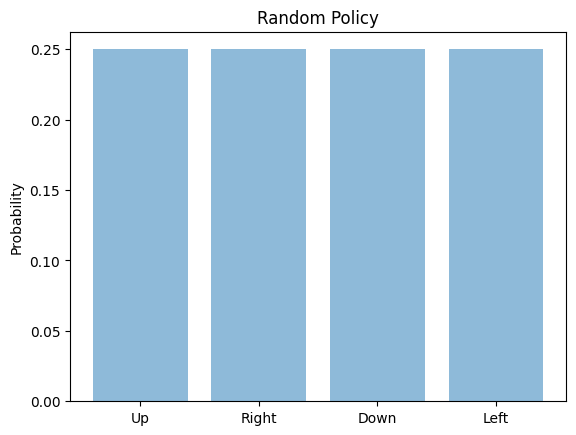

In [38]:
objects = ["Up", "Right","Down", "Left"]
y_pos = np.arange(len(objects))

plt.bar(y_pos, action_probabilities, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Probability')
plt.title('Random Policy')

In [39]:
env.close()

In [48]:
env = Maze()
state = env.reset()
done = False
img = plt.imshow(env.render(mode="rgb_array"))
while not done:
    action = np.random.choice(range(4), 1, p=action_probabilities)
    _, _, done, _ = env.step(action)
    img.set_data(env.render(mode="rgb_array"))
    plt.axis("off")
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
env.close()